# Forecasting casos leves de COVID-19

In [11]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from epiweeks import Week

# Dados

In [4]:
df = pd.read_csv('../data/processed/dados.csv', delimiter = ';')

In [5]:
df.head()

,Unnamed: 0,id,dataInicioSintomas,dataNotificacao,dataAtualizacao,dataEncerramento,dataRegistro,regiao,estadoIBGE,idade
0,1,uVOUpcAwja,2023-11-25,2023-11-27,2023-12-12,2023-12-12,2023-11-27,1,12,25.0
1,2,Cg7XavXuQq,2023-12-01,2023-12-05,2023-12-12,2023-12-11,2023-12-07,1,13,26.0
2,3,bF7E1KySnh,2023-12-09,2023-12-12,2023-12-14,2023-12-14,2023-12-14,1,12,22.0
3,4,A8sEjw9taT,2023-11-21,2023-11-27,2023-12-18,NaN,2023-12-18,1,13,24.0
4,5,CfqY4VBedF,2023-12-11,2023-12-12,2023-12-18,2023-12-18,2023-12-18,1,12,24.0


# Tratamento de dados

In [6]:
df.shape

(2704725, 10)

In [7]:
df1 = df[[
    'dataInicioSintomas',
    'dataNotificacao',
    'dataAtualizacao',
    'dataEncerramento',
    'dataRegistro',
    'regiao',
    'estadoIBGE',
    'idade'
]]

df1.head()

,dataInicioSintomas,dataNotificacao,dataAtualizacao,dataEncerramento,dataRegistro,regiao,estadoIBGE,idade
0,2023-11-25,2023-11-27,2023-12-12,2023-12-12,2023-11-27,1,12,25.0
1,2023-12-01,2023-12-05,2023-12-12,2023-12-11,2023-12-07,1,13,26.0
2,2023-12-09,2023-12-12,2023-12-14,2023-12-14,2023-12-14,1,12,22.0
3,2023-11-21,2023-11-27,2023-12-18,NaN,2023-12-18,1,13,24.0
4,2023-12-11,2023-12-12,2023-12-18,2023-12-18,2023-12-18,1,12,24.0


In [8]:
print(df1.isna().sum())

dataInicioSintomas          0
dataNotificacao             0
dataAtualizacao             0
dataEncerramento      1130459
dataRegistro                0
regiao                      0
estadoIBGE                  0
idade                    2226
dtype: int64


## Criar série temporal por semana epidemiológica

In [10]:
# Converter para datetime
df['dataInicioSintomas'] = pd.to_datetime(df['dataInicioSintomas'])

# Calcular semana epidemiológica e ano epidemiológico
df['semana_epi'] = df['dataInicioSintomas'].apply(lambda x: Week.fromdate(x).week)
df['ano_epi'] = df['dataInicioSintomas'].apply(lambda x: Week.fromdate(x).year)

# Criar coluna dt_event com a data correspondente ao último dia da semana (domingo)
df['dt_event'] = df.apply(lambda row: Week(row['ano_epi'], row['semana_epi']).enddate(), axis=1)

# Criar uma coluna com o número da semana epidemiológica
df['num_semana_epi'] = df['semana_epi']

# Agrupar por dt_event e contar ocorrências
serie_semana = df.groupby(['dt_event', 'num_semana_epi']).size().reset_index(name='count')

# Mostrar a série temporal semanal com a coluna de semana epidemiológica
print(serie_semana)

       dt_event  num_semana_epi   count
0    2023-01-07               1  103376
1    2023-01-14               2   64015
2    2023-01-21               3   45188
3    2023-01-28               4   37199
4    2023-02-04               5   35865
..          ...             ...     ...
99   2024-11-30              48   13603
100  2024-12-07              49   16290
101  2024-12-14              50   14014
102  2024-12-21              51    6288
103  2024-12-28              52       3

[104 rows x 3 columns]


In [15]:
serie_semana.dtypes

dt_event          object
num_semana_epi     int64
count              int64
dtype: object

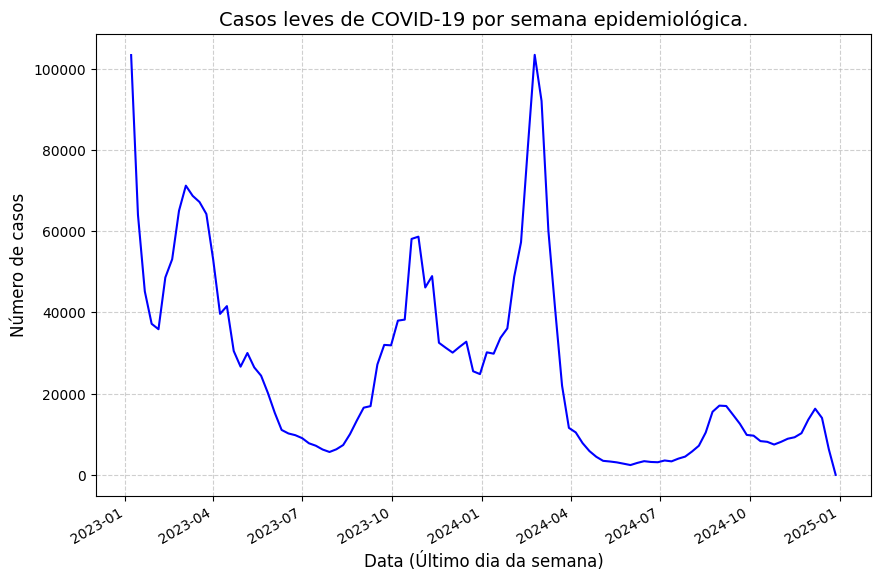

In [36]:
# Visualização dos dados
plt.figure(figsize=(10, 6))
plt.plot(serie_semana['dt_event'], serie_semana['count'], color='b')

plt.title('Casos leves de COVID-19 por semana epidemiológica.', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.xlabel('Data (Último dia da semana)', fontsize=12)
plt.ylabel('Número de casos', fontsize=12)

plt.show()

# Análise exploratória da ST